## Importing Required Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2022-08-02 12:51:56.126282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Documents/Image Processing/Artificial Neural Network/henv/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-02 12:51:56.126303: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalizting the values

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

2022-08-02 12:51:57.961136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Documents/Image Processing/Artificial Neural Network/henv/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-02 12:51:57.961160: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-02 12:51:57.961175: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-H410M-H-V3): /proc/driver/nvidia/version does not exist
2022-08-02 12:51:57.961336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs = 10)

2022-08-02 12:51:58.149464: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2638 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1056 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0721 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0322 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [7]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model/assets


In [8]:
model = tf.keras.models.load_model('handwritten.model')

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 762us/step - loss: 0.1256 - accuracy: 0.9704
0.1256020963191986
0.9703999757766724


1/1 [==============================] - 0s 47ms/step
This digit is probably a 1


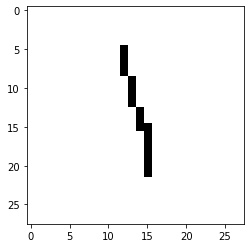

1/1 [==============================] - 0s 11ms/step
This digit is probably a 3


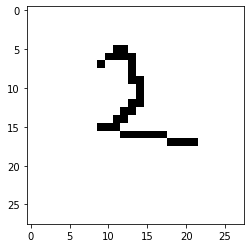

1/1 [==============================] - 0s 10ms/step
This digit is probably a 3


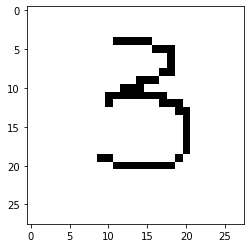

1/1 [==============================] - 0s 11ms/step
This digit is probably a 4


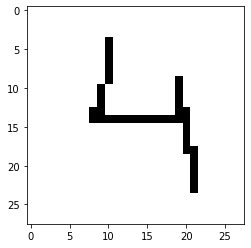

1/1 [==============================] - 0s 11ms/step
This digit is probably a 5


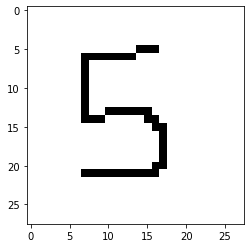

1/1 [==============================] - 0s 12ms/step
This digit is probably a 6


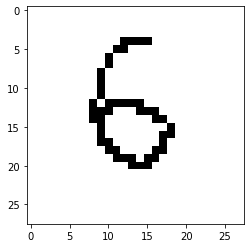

1/1 [==============================] - 0s 11ms/step
This digit is probably a 3


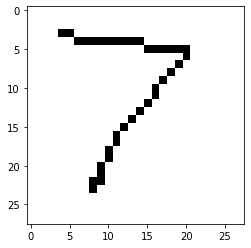

1/1 [==============================] - 0s 11ms/step
This digit is probably a 6


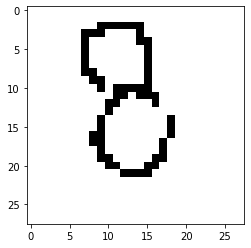

1/1 [==============================] - 0s 10ms/step
This digit is probably a 3


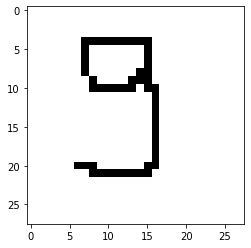

1/1 [==============================] - 0s 11ms/step
This digit is probably a 6


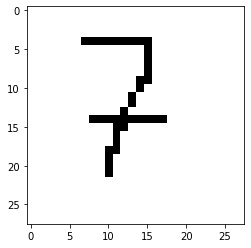

1/1 [==============================] - 0s 11ms/step
This digit is probably a 9


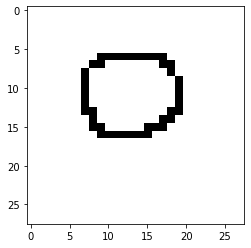

1/1 [==============================] - 0s 11ms/step
This digit is probably a 1


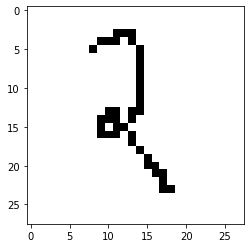

1/1 [==============================] - 0s 10ms/step
This digit is probably a 4


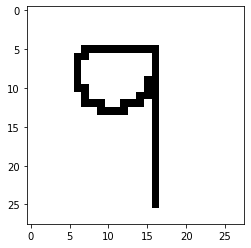

1/1 [==============================] - 0s 11ms/step
This digit is probably a 1


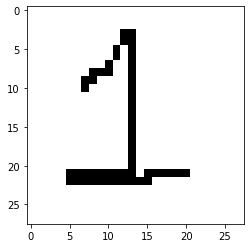

1/1 [==============================] - 0s 11ms/step
This digit is probably a 4


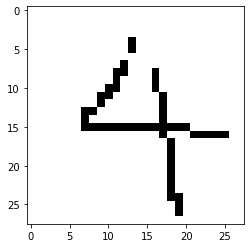

1/1 [==============================] - 0s 12ms/step
This digit is probably a 8


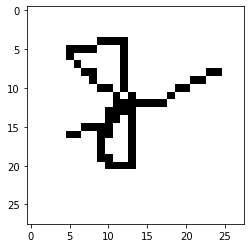

In [10]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    except:
        print("Errors!")
    finally:
        image_number += 1